In [9]:
import pandas as pd
from random import random
#import numpy
from numpy import array
import numpy as np
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor 
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

import csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from statistics import mean
from datetime import date
import datetime
import os
from sklearn.utils import check_array as check_arrays
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# Create folder to save results in
identify = 'TimeSeriesSKLCluster5Train_56'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Whole dataset
#df = pd.read_csv('/Users/clausholm/Documents/Python/Master_thesis/Data/German_radio_cleaned/DailyPlaysDatasetTop50WithFeatures.csv', sep=';', index_col=0, decimal=',')
#df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek','Label 2'])

"""
# 96 songs Cluster dataset (daily plays)
clusterData = [
        '/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster1DailyPlays.csv'
        #'/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster2DailyPlays.csv',
        #'/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster3DailyPlays.csv',
        #'/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster4DailyPlays.csv',
        #'/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster5DailyPlays.csv'
        ]
"""

"""
# 96 songs Cluster dataset (weekly plays)
clusterData = [
        #'/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster1WeeklyPlays.csv'
        #'/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster2WeeklyPlays.csv',
        #'/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster3WeeklyPlays.csv',
        #'/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster4WeeklyPlays.csv',
        '/Users/clausholm/Documents/Python/Master_thesis/Data/clustersets/5clusters/cluster5WeeklyPlays.csv'
        ]
"""

# 1096 songs Cluster dataset (daily plays)
clusterData = [
        'datasets/1096songs/cluster_datasets/cluster1DailyPlays.csv'
        ]

# Load Dataset
df = pd.read_csv(clusterData[0], sep=';', index_col=0, decimal=',')
df = df.drop(columns=['cluster'])

# Set dataset range
df_range = '160'
df = df.loc[:, :df_range]

# Uncomment the following to choose test songs
list_of_test_songs = [#'Katy Perry - Never Really Over' , 
              #'Taylor Swift - You Need To Calm Down', 
              #'Shawn Mendes & Camila Cabello - SeÃ±orita', 
              #'Ava Max - So Am I', 
              #'Andreas Bourani - Auf uns', 
              #'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              #'Mark Forster - Sowieso', 
              #'Camila Cabello feat. Young Thug - Havana',  
            ] 

# Define test data
df_test = df.loc[list_of_test_songs]
df_test

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
Pietro Lombardi - Nur Ein Tanz,23,36,31,42,46,41,55,55,58,55,...,6,7,11,9,8,7,8,7,6,9
Loud Luxury feat. brando - Body,8,0,2,1,0,1,5,13,3,5,...,41,41,46,55,40,42,36,41,42,45


In [11]:
# Define train data
df_train = df[~df.index.isin(list_of_test_songs)]
df_train

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,35,34,45,29,40,47,21,30,33,15
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,33,32,29,35,33,28,29,33,30,31
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,3,1,0,1,1,1,3,1,2
Childish Gambino - This Is America,25,51,46,48,37,49,82,78,80,83,...,36,32,37,45,46,47,49,47,47,38
Chris Brown - Undecided,41,68,75,108,111,103,98,111,120,136,...,21,40,35,41,35,40,40,31,28,26
Christine and The Queens - Doesn't matter_EnglischVersion,2,1,0,3,3,3,0,2,1,0,...,0,1,0,0,0,0,0,0,0,1
Daya - New,1,1,1,3,3,1,1,3,1,1,...,0,1,0,0,1,0,0,0,0,1
Die Lochis - Lieblingslied,2,3,9,10,7,14,12,13,13,14,...,17,16,19,18,10,11,13,18,10,13
Dotan - Numb,43,70,77,81,68,72,79,58,61,63,...,4,2,5,6,7,3,4,5,3,3
Gaullin - Moonlight,1,2,3,5,3,6,2,3,2,3,...,241,233,235,275,278,250,251,219,240,204


In [16]:
# Split train dataset into input and output days. Change value of input_days
n_steps_in = 28
number_of_total_days = 112
n_steps_out = number_of_total_days - n_steps_in


# define the train data input and output
train_input_data = df_train.iloc[:, 0:n_steps_in]
train_output_data = df_train.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
train_input = array(train_input_data)
train_output = array(train_output_data)

# create scaler
#x_scaler = MinMaxScaler()
#y_scaler = MinMaxScaler()
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# fit scaler on data
train_input = x_scaler.fit_transform(train_input)
train_output = y_scaler.fit_transform(train_output)

print("Input days: ", len(train_input[0])) 
print("Output days: ", len(train_output[0]))
print("Example of first song input data: ", train_input[0])
print("Example of first song output data: ", train_output[0])


Input days:  28
Output days:  84
Example of first song input data:  [1.79981366 1.21160452 2.33522278 1.90701993 6.04517394 6.57951336
 6.96048303 6.99165311 7.43641877 4.09928879 6.84665708 4.61491059
 5.9607816  7.85882994 6.37116807 8.14656484 7.54197338 8.58413172
 8.46995613 6.43507432 6.77984672 6.62979545 7.95614507 6.99919678
 5.38145781 6.02503671 7.63978439 6.15772713]
Example of first song output data:  [ 6.66418041  7.1841431   7.03592792  5.64938921  6.25907465  3.89632332
  4.30773665  5.15046389  6.12820283  6.86256393  4.95611132  4.78595778
  4.20747218  3.34178628  2.89578343  3.78406939  3.6891645   3.86065314
  3.95852114  3.30976896  4.60216634  5.2616127   2.85245117  5.00503407
  4.6738199   4.05010361  3.91742528  7.22671074  5.2980922   4.86112565
  5.28409615  5.65650761  5.50856902  5.8816549   7.92658855  6.50721774
  8.45595934  6.61377224  6.32770033  8.44131606  6.65517973  4.56627439
  2.32497163  2.32026139  2.09573021  3.435755    3.16423458  3.1741978

In [17]:
# Split test dataset into input and output days.

# define the test data input and output
test_input_data = df_test.iloc[:, :n_steps_in]
test_output_data = df_test.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
test_input = array(test_input_data)
test_output = array(test_output_data)

# transform data
test_input = x_scaler.transform(test_input)

print("Input days: ", len(test_input[0])) 
print("Output days: ", len(test_output[0]))
print("Example of first song input data: ", test_input[0])
print("Example of first song output data: ", test_output[0])

Input days:  28
Output days:  84
Example of first song input data:  [1.02134954 1.36262605 0.95476864 1.36733756 1.5282209  1.19461721
 1.62718097 1.51642553 1.61195906 1.4634922  1.4354379  1.32557145
 1.18807119 1.95942454 2.72471674 1.94494455 1.0460396  0.76334911
 0.59001151 0.53811164 1.0051837  1.14300244 0.81295156 0.62784721
 0.51383442 0.60761482 0.39066969 1.26408222]
Example of first song output data:  [63 72 44 51 47 39 52 54 52 38 49 49 46 39 48 53 26 29 44 38 31 49 66 37
 42 43 36 38 39 34 22 27 20 26 30 14 21 26 18 25  9 30 37 12 23 24 23 11
 16 26 25 24 25 14  9 14 10 15 11 13 10  8 12 16  7 16 15 15 13 14 16  9
 17 10 14 13 11 13 17 15 13 13 13  8]


KNN
KNN
Pietro Lombardi - Nur Ein Tanz
Bias: 1.864286
MAE: 6.121429
MAPE: 27.447713
MSE: 72.504286
RMSE: 8.514945
RMSPE 41.673101
_________________________
Loud Luxury feat. brando - Body
Bias: 7.226190
MAE: 7.378571
MAPE: 51.553039
MSE: 83.051905
RMSE: 9.113282
RMSPE 56.322942
_________________________


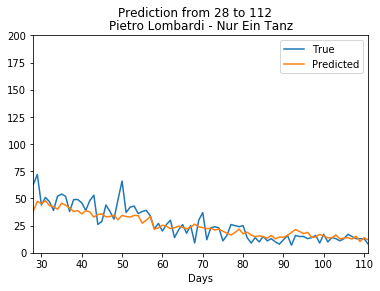

Song:  Pietro Lombardi - Nur Ein Tanz
Prediction from 28 to 112
________________________________________________________________


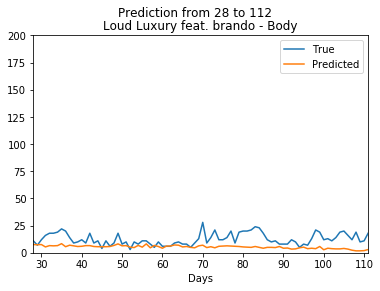

Song:  Loud Luxury feat. brando - Body
Prediction from 28 to 112
________________________________________________________________
RF
RF
Pietro Lombardi - Nur Ein Tanz
Bias: -16.168810
MAE: 17.072857
MAPE: 98.532984
MSE: 348.189102
RMSE: 18.659826
RMSPE 127.693452
_________________________
Loud Luxury feat. brando - Body
Bias: 4.275357
MAE: 5.512500
MAPE: 41.334250
MSE: 51.769318
RMSE: 7.195090
RMSPE 51.757340
_________________________


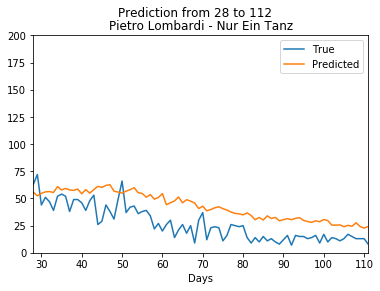

Song:  Pietro Lombardi - Nur Ein Tanz
Prediction from 28 to 112
________________________________________________________________


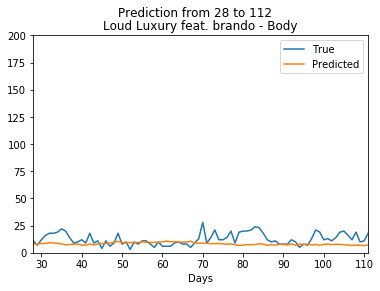

Song:  Loud Luxury feat. brando - Body
Prediction from 28 to 112
________________________________________________________________
MLP
MLP


/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pietro Lombardi - Nur Ein Tanz
Bias: 6.998060
MAE: 8.908267
MAPE: 32.034652
MSE: 141.459873
RMSE: 11.893690
RMSPE 38.607208
_________________________
Loud Luxury feat. brando - Body
Bias: 4.218093
MAE: 5.568418
MAPE: 41.241673
MSE: 53.648434
RMSE: 7.324509
RMSPE 51.448551
_________________________


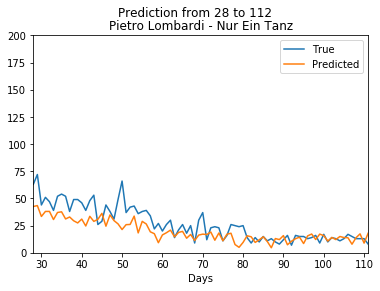

Song:  Pietro Lombardi - Nur Ein Tanz
Prediction from 28 to 112
________________________________________________________________


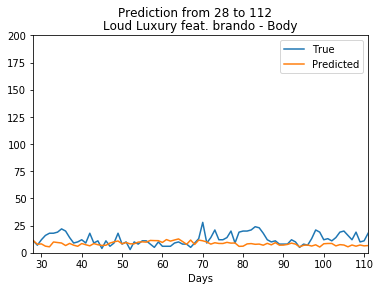

Song:  Loud Luxury feat. brando - Body
Prediction from 28 to 112
________________________________________________________________


In [19]:

models = [
    #LinearRegression(),
    #Lasso(),
    #Ridge(),
    KNeighborsRegressor(n_neighbors=5),
    #GaussianProcessRegressor(),
    #DecisionTreeRegressor(),
    RandomForestRegressor(),
    MLPRegressor()
    ]

# Name the model
model_names = ['KNN','RF', 'MLP']
   
# Make tests for all models in variable
for i in range(len(models)):
    print(model_names[i])
    
    model_name = model_names[i]
    print(model_name)
    
    # Make folder to each model to save results of model
    path = folder_name+'/'+model_name
    #os.mkdir(path)
    
    models[i].fit(train_input, train_output) #training the algorithm

    # transform data back to original scale
    yhat = models[i].predict(test_input)
    
    # transform data back from standardized or normalized
    yhat = y_scaler.inverse_transform(yhat)

    # Create variable for each song, used to compare predicted and true value
    lst1 = [test_output[0], yhat[0]]
    lst2 = [test_output[1], yhat[1]]
    
    # Set value for labelling
    daysOrWeeks = 'Days'

    # Make dataset of test song variables
    df1 = pd.DataFrame(lst1).T
    df1.columns = ['True', 'Predicted']
    df1[daysOrWeeks] = df1.index + n_steps_in
    df1.set_index(daysOrWeeks,inplace=True)

    df2 = pd.DataFrame(lst2).T
    df2.columns = ['True', 'Predicted']
    df2[daysOrWeeks] = df2.index + n_steps_in
    df2.set_index(daysOrWeeks,inplace=True)


    # Forecast Error (or Residual Forecast Error)
    forecast_errors = [test_output[i]-yhat[i] for i in range(len(test_output))]
    #print('Forecast Errors: %s' % forecast_errors)  

    df_result = pd.DataFrame(columns=['Song', 'Date', 'Bias', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'Predict_from', 'Predict_to'])

    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def root_mean_square_percentage_error(y_true, y_pred):
        loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100
        return loss

    for i in range(len(test_output)):
        print(list_of_test_songs[i])

        # Mean Forecast Error (or Forecast Bias), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error  
        bias = mean(forecast_errors[i])
        mae = mean(abs(forecast_errors[i]))
        mape = mean_absolute_percentage_error(test_output[i], yhat[i])
        mse = mean_squared_error(test_output[i], yhat[i]) 
        rmse = sqrt(mse)
        rmspe = root_mean_square_percentage_error(test_output[i], yhat[i])
        df_result = df_result.append({'Date': date.today(),'Song': list_of_test_songs[i], 'Bias': bias, 'MAE': mae, 'MAPE': mape, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe, 'Predict_from':n_steps_in, 'Predict_to': number_of_total_days}, ignore_index=True)

        print('Bias: %f' % bias)
        print('MAE: %f' % mae)
        print('MAPE: %f'% mape)
        print('MSE: %f' % mse)
        print('RMSE: %f' % rmse)
        print('RMSPE %f' % rmspe)
        print('_________________________')

    # Create datetime for time of results
    now = datetime.datetime.now()
    now = str(now.strftime("%Y-%m-%d %H:%M:%S"))
    

    # Save Results to csv file in folder
    #df_result.to_csv(path+'/'+identify+'_'+model_name+'_'+now+'.csv', sep=';', decimal=',' )

    # Define plotting of graphs and saving them to folder
    pred_title = "Prediction from "+ str(n_steps_in)+" to "+str(number_of_total_days)
    fig_size = 200

    df1.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[0])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[0]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[0])
    print(pred_title)
    print('________________________________________________________________')

    df2.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[1])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[1]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[1])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')
    

